## 1. Lời giới thiệu
Các bạn ở trong forum đều khá quen thuộc với các thuật ngữ như Machine Learning, DeepLearning hay tên các thuật toán, models. Tuy nhiên điều quan trọng nhất trong phân tích, xử lý, dự đoán,... đó là dữ liệu. Đặc biệt dữ liệu phải sạch, có nhãn,... 

Trong thực tế, có được bộ dữ liệu như vậy là không hề đơn giản. Nếu như việc phân tích dữ liệu được chia thành 3 phần:
Data Collection - Data Processing - Data Analysis thì hai phần đầu mất nhiều thời gian và công sức nhất. 
Trong series bài về Data Science này, tôi sẽ cùng các bạn đi từ đầu đến cuối, rất hi vọng sẽ mang lại cho các bạn ít nhất một cảm giác đó là "Phân tích dữ liệu thật là thú vị". 

## 2. Ngôn ngữ và thư viện
    - Ngôn ngữ: Python 3
    - Packages (update theo từng bài): 
        + BeautifulSoup: download dữ liệu từ web 
        + requests: gửi yêu cầu đến trang web
        + re: xử lý, làm sạch dữ liệu
        + pandas: tạo dữ liệu dạng bảng, dễ dàng cho qúa trình phân tích, model dữ liệu

Qua series bài này, các bạn sẽ hiểu thêm về sức mạnh của Python trong việc xử lý và phân tích dữ liệu.

## 3. Đặt vấn đề
Tôi là một người có niềm đam mê ăn uống, đang có cửa hàng (hoặc dự kiến mở cửa hàng) tôi muốn phân tích dữ liệu về các cửa hàng, các đối thủ để cho thể giúp tôi ra quyết định. Sau vài tìm kiếm đơn giản trên Google, tôi biết được rằng trang web: "https://www.now.vn" có rất nhiều dữ liệu mà tôi cần. Vậy tôi phải làm gì để có thể thu thập, phân tích dữ liệu đó?

### Data Collection
Trước hết chúng ta sẽ thực hiện 1 lệnh tìm kiếm từ khóa "royaltea" trong ô tìm kiếm của "https://www.now.vn"

Link tương ứng: "https://www.now.vn/ha-noi/danh-sach-dia-diem-giao-tan-noi?q=royaltea"

Kết quả trả về là các quán trà sữa royaltea tại Hà Nội. 

Giả sử chúng ta muốn tải thông tin của quán đầu tiên, ta sẽ thực hiện các bước sau:

    1) Tô đậm nơi muốn tải thông tin
    2) Click chuột phải, chọn Inspect


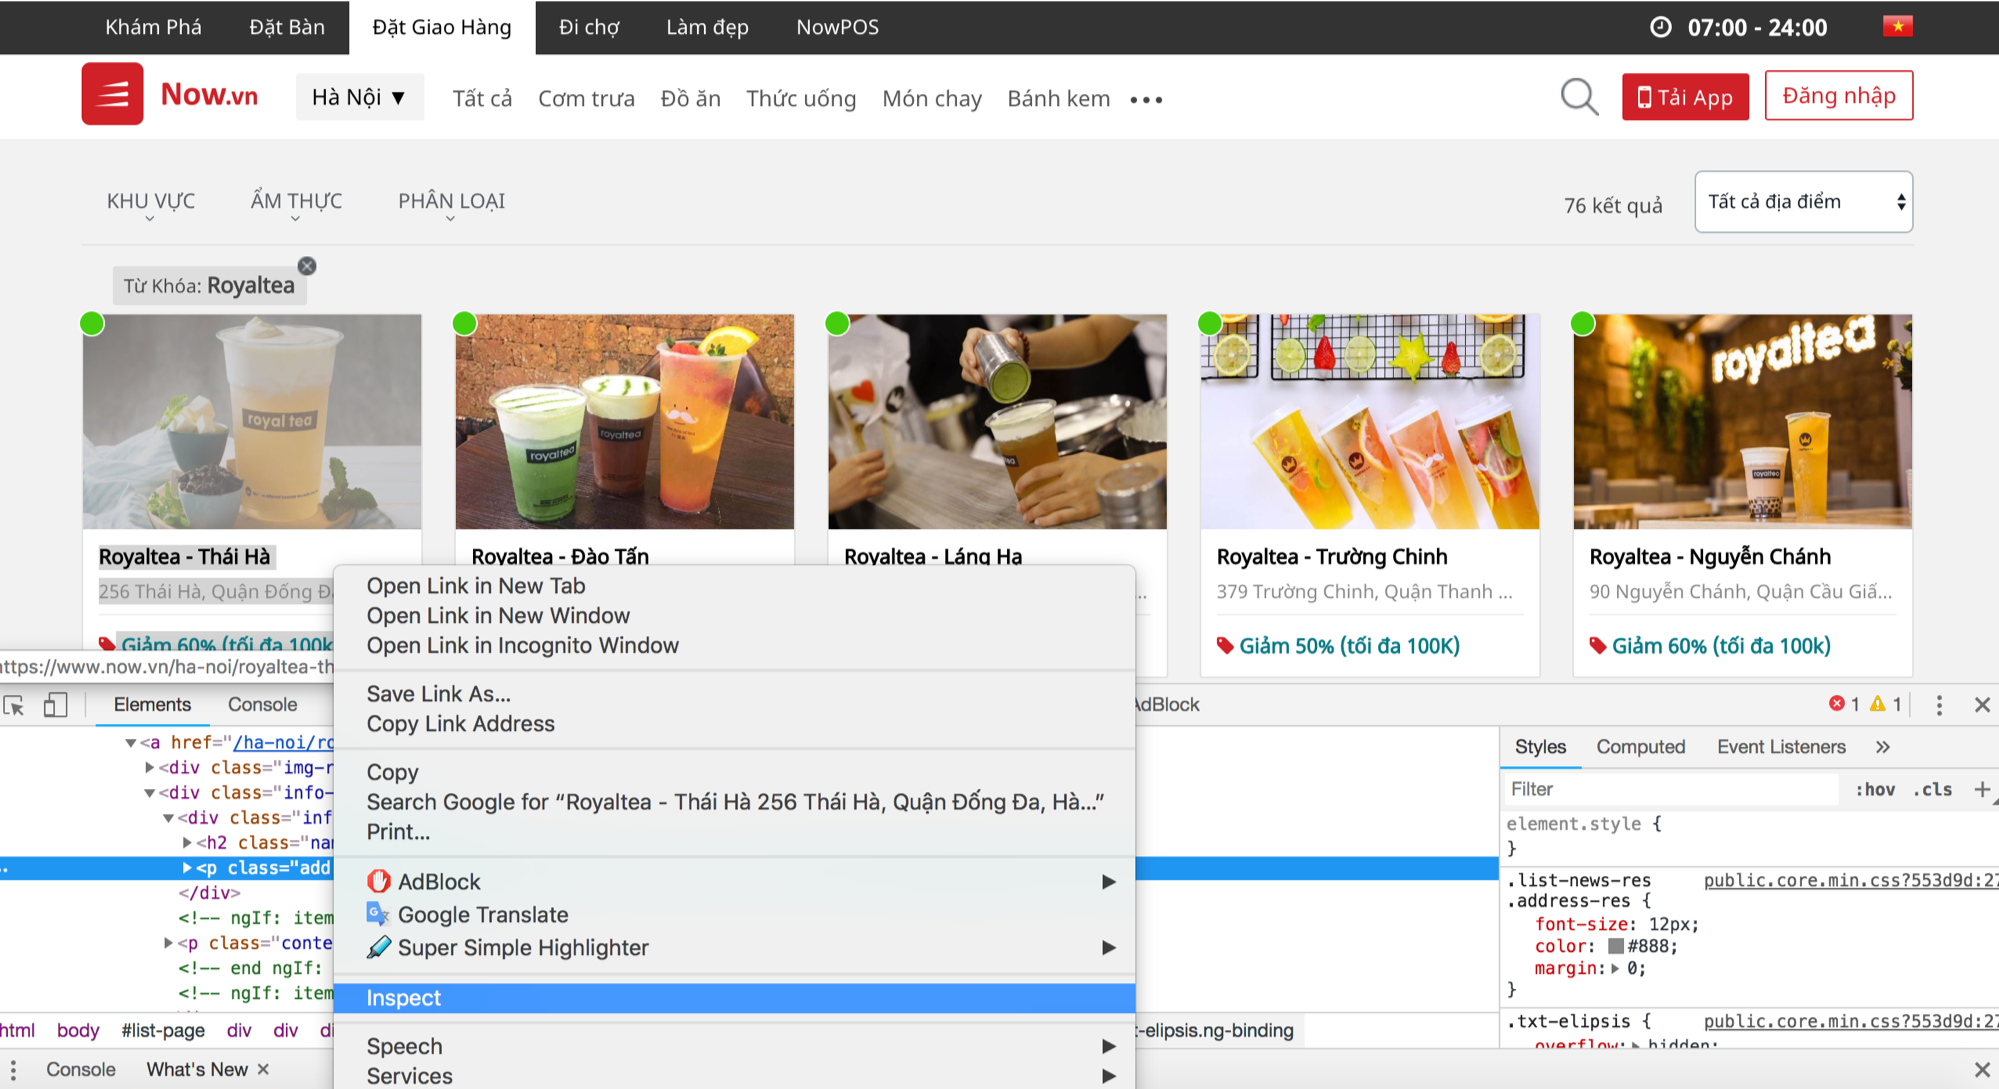

In [94]:
from IPython.display import Image
Image(filename='picture/Picture1.png') 

Tiếp theo chúng ta lựa chọn tag p và click:

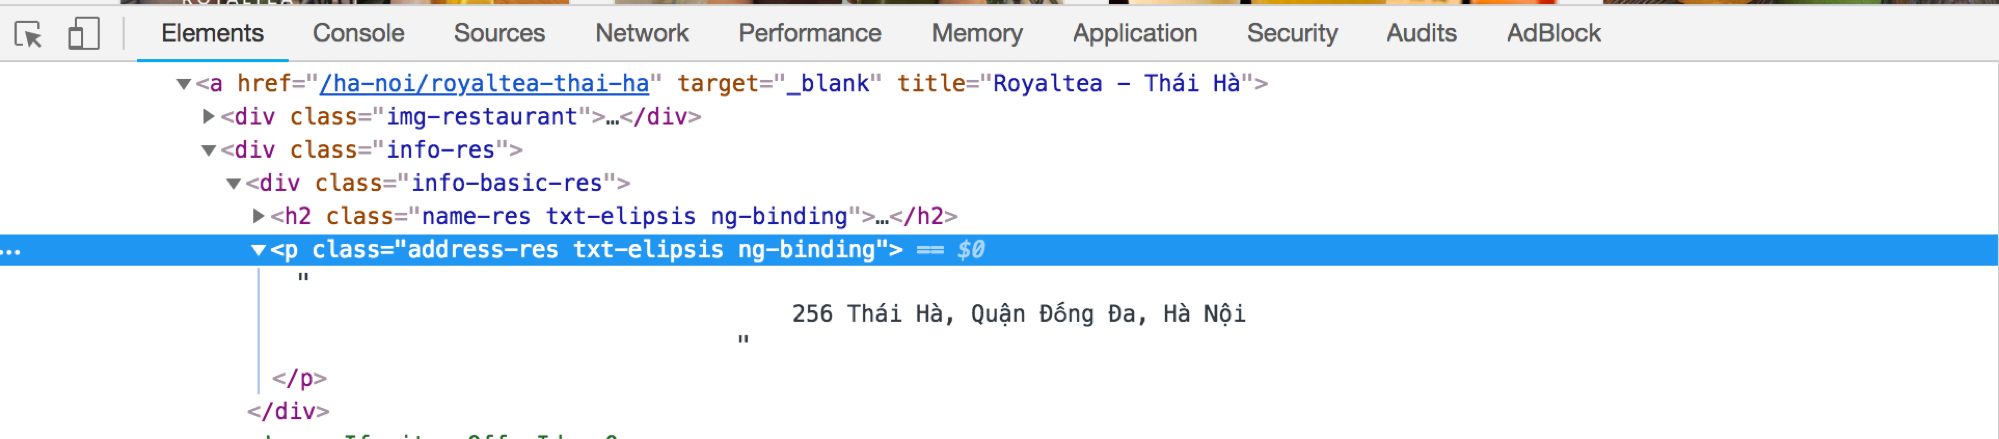

In [95]:
Image(filename='picture/Picture2.png') 

Đến đây chúng ta có thể hình dung các thông tin hiển thị ở trên web sẽ được lưu trữ dưới các tags của html. Nếu chúng ta có 1 thư viện giúp load dữ liệu này về có cấu trúc tương tự thì có thể lấy được các thông tin này 1 cách tự động. 

Đó chính là ** BeautifulSoup (bs)**

In [92]:
from bs4 import BeautifulSoup 
import requests

## Load trang web, tách theo các thẻ tag như html
page = requests.get("https://www.now.vn/ha-noi/danh-sach-dia-diem-giao-tan-noi?q=royaltea")
soup = BeautifulSoup(page.content, 'html.parser')

## Save trang web dưới dạng text, để dễ dàng tìm kiếm các thẻ tag 
text_file = open("Output.txt", "w")
text_file.write(soup.prettify())
text_file.close()

Đến đây, nếu chung ta mở file Ouput.txt và tìm kiếm từ khóa "256" thì kết quả sẽ như sau:

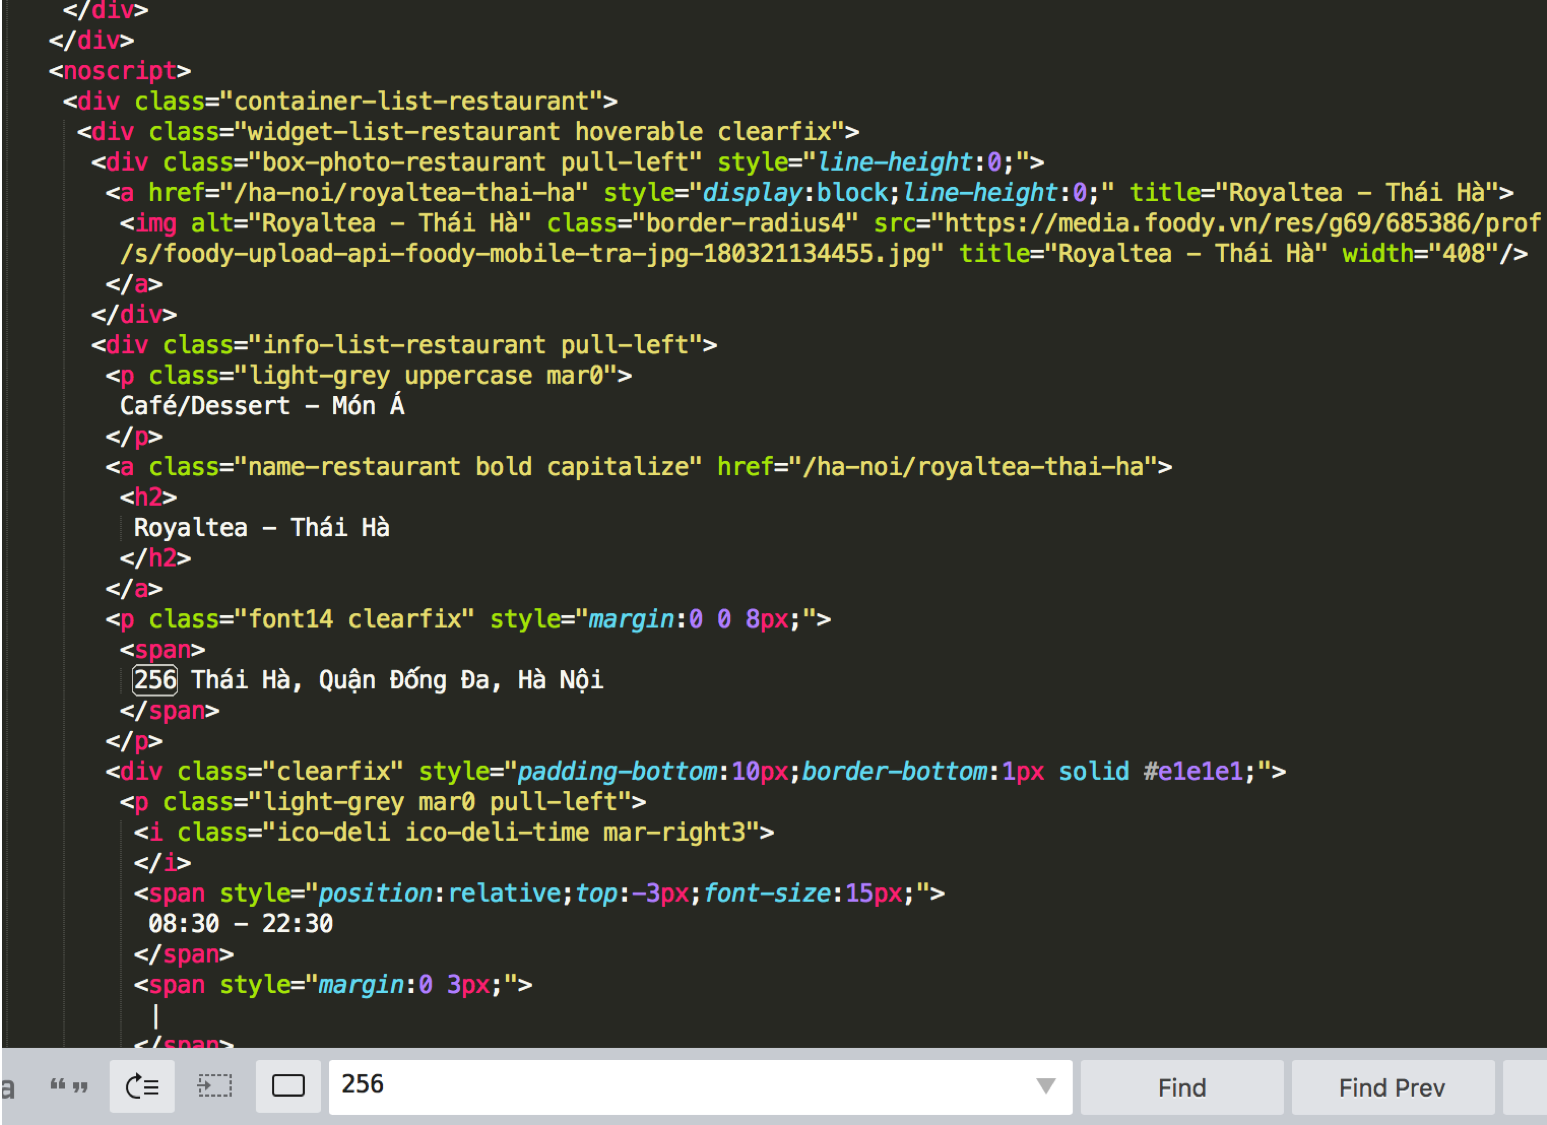

In [96]:
Image('picture/Picture3.png')

Địa chỉ "256 Thái Hà,..." nằm trong tag 'span' (tag con); 

tag cha của tag 'span' là tag 'p' có class ='font14...'; 

ngang hàng với tag 'p' này có tag 'p' khác đó là class ='light-grey...'; 

tag cha của tag 'p' là tag 'div' có class = "info-list-restaurant pull-left"

Điều đó có nghĩa là nếu chúng ta có thể truy cập đến tag **cha**, thì thêm 1 lần filter nữa, 
chúng ta có thể tách được thông tin của tag **con**

Để tìm kiếm tất cả các thẻ 'div' có class = "info-list-restaurant pull-left", ta thực hiện câu lệnh như bên dưới

Lưu ý với **BeautifulSoup(bs)**:
    - find_all: trả về tất cả giá trị có thể
    - find: trả về giá trị đầu tiên


In [98]:
alls = soup.find_all('div',class_="info-list-restaurant pull-left")
print (alls[0])

<div class="info-list-restaurant pull-left">
<p class="light-grey uppercase mar0">Café/Dessert - Món Á</p>
<a class="name-restaurant bold capitalize" href="/ha-noi/royaltea-thai-ha"><h2>Royaltea - Thái Hà</h2></a>
<p class="font14 clearfix" style="margin:0 0 8px;">
<span>256 Thái Hà, Quận Đống Đa, Hà Nội</span>
</p>
<div class="clearfix" style="padding-bottom:10px;border-bottom:1px solid #e1e1e1;">
<p class="light-grey mar0 pull-left">
<i class="ico-deli ico-deli-time mar-right3"></i>
<span style="position:relative;top:-3px;font-size:15px;">08:30 - 22:30</span>
<span style="margin:0 3px;">|</span>
<i class="ico-deli ico-deli-money mar-right3"></i>
<span style="position: relative; top: -3px; font-size: 15px;">30,000 - 70,000</span>
</p>
</div>
<div class="info-delivery-restaurant clearfix">
<div class="column-info-deli pull-left">
<p class="mar0">
<span class="uppercase light-grey">tối thiểu</span>
<i class="ico-deli ico-deli-bill" style="margin-left:4px;position:relative;top:2px;"></i>

#### Đến đây, nếu chúng ta muốn lấy thông tin địa chỉ quán, chỉ cần:

In [100]:
alls[0].find('span').get_text()

'256 Thái Hà, Quận Đống Đa, Hà Nội'

#### Nếu muốn lấy thông tin tên quán thì chúng ta có thể dùng lệnh 'find' hoặc sử dụng câu lệnh 'select' của **bs**

    - select: ví dụ select('a h2'): lựa chọn tất cả các dòng có chứa đồng thời 2 thẻ a và h2

In [101]:
alls[0].select('a h2')[0].get_text()

'Royaltea - Thái Hà'

#### Nếu muốn lấy thông tin hyperlink, chúng ta sẽ sử dụng câu lệnh, 'find' và thêm method 'get'

In [102]:
alls[0].find('a').get('href')

'/ha-noi/royaltea-thai-ha'

#### Lưu ý là chúng ta đang sử dụng phần tử đầu tiên alls[0], nếu lặp lại toàn bộ với các phần tử khác, chúng ta sẽ lấy được toàn bộ thông tin của các quán khác.


#### Cuối cùng, để có thể lưu trữ, visualize, xử lý dữ liệu, chúng ta sử dụng dataframe của pandas

## 4. Final Code 1

In [9]:
from bs4 import BeautifulSoup 
import requests
import re
import pandas as pd

In [69]:
def dataframe_keyword(location,keyword):
    """
    input:
        vitri: ho-chi-minh, ha-noi,...
        keyword: tra+sua,royaltea,com+tam,...
        
    output:
        dataframe bao gom:
            ten_quan:
            dia_chi:
            hyper_link:
    """
    prefix = 'https://www.now.vn'
    ten_quan = []
    dia_chi = []
    link = []
    for i in range(1,100):
        url = 'https://www.now.vn/%s/danh-sach-dia-diem-giao-tan-noi-trang-%s?q=%s'%(location,i,keyword)
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        alls = soup.find_all('div',class_="info-list-restaurant pull-left")
        if len(alls) == 0:
            break
        else:
            for a in alls:
                ten_quan.append(a.select('a h2')[0].get_text())
                dia_chi.append(a.find('span').get_text())
                link.append(prefix + a.find('a').get('href'))
    data_frame = pd.DataFrame({
        'ten_quan': ten_quan,
        'dia_chi': dia_chi,
        'link': link,})
    return data_frame
    

In [67]:
royaltea_ha_noi = dataframe_keyword('ha-noi','royaltea')

### Dataframe

In [68]:
royaltea_ha_noi

,dia_chi,link,ten_quan
0,"256 Thái Hà, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-thai-ha,Royaltea - Thái Hà
1,"142 Vũ Phạm Hàm (Đối Diện 888 Đường Láng), Quậ...",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea Vietnam By Hongkong - Vũ Phạm Hàm
2,"98 Nguyễn Hữu Huân, P. Hàng Bạc, Quận Hoàn Kiế...",https://www.now.vn/ha-noi/royaltea-nguyen-huu-...,Royaltea - Nguyễn Hữu Huân
3,"76 Đào Tấn, Quận Ba Đình, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea - Đào Tấn
4,"89 Hoàng Cầu, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-hoang-cau,Royaltea - Hoàng Cầu
5,"90 Nguyễn Chánh, Quận Cầu Giấy, Hà Nội",https://www.now.vn/ha-noi/royaltea-nguyen-chanh,Royaltea - Nguyễn Chánh
6,"298 Tây Sơn, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea - Trà Sữa Hồng Kông - Tây Sơn
7,"515 Nguyễn Trãi, Quận Thanh Xuân, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea - Trà Sữa Hồng Kông - Nguyễn Trãi
8,"165 Giảng Võ, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea Vietnam By Hongkong - Giảng Võ
9,"21B Hàng Bài, Quận Hoàn Kiếm, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea - Trà Sữa Hồng Kông - Hàng Bài


In [77]:
royaltea_truong_chinh.sort_values(['so_lan_dat'],ascending=False)

,gia_ban,so_lan_dat,ten_mon
84,53.0,542,Trà Royal Xoài Kem Cheese
39,53.0,542,Trà Royal Xoài Kem Cheese
71,45.0,394,Trà Sữa Kem Cheese
26,45.0,394,Trà Sữa Kem Cheese
6,57.0,388,Trà Hoa Quả Royaltea Đặc Biệt
51,57.0,388,Trà Hoa Quả Royaltea Đặc Biệt
72,43.0,281,Trà Sữa Trân Châu Trắng
27,43.0,281,Trà Sữa Trân Châu Trắng
59,47.0,255,Hồng Trà Royal Kem Cheese
14,47.0,255,Hồng Trà Royal Kem Cheese


#### Tuy nhiên Tiếng Việt xử lý khá khó, nên chúng ta sẽ chuyển toàn bộ về tiếng Việt không dấu với source code open trên Github

In [86]:
def no_accent_vietnamese(utf8_str):
    """
    ref: https://gist.github.com/thuandt/3421905#file-no_accent_vietnamese-py
    input: "Tôi yêu Việt Nam"
    output: "Toi yeu Viet Nam"
    """
    INTAB = "ạảãàáâậầấẩẫăắằặẳẵóòọõỏôộổỗồốơờớợởỡéèẻẹẽêếềệểễúùụủũưựữửừứíìịỉĩýỳỷỵỹđẠẢÃÀÁÂẬẦẤẨẪĂẮẰẶẲẴÓÒỌÕỎÔỘỔỖỒỐƠỜỚỢỞỠÉÈẺẸẼÊẾỀỆỂỄÚÙỤỦŨƯỰỮỬỪỨÍÌỊỈĨÝỲỶỴỸĐ"
    #INTAB = [ch.encode('utf8') for ch in unicode(INTAB, 'utf8')]
    OUTTAB = "a" * 17 + "o" * 17 + "e" * 11 + "u" * 11 + "i" * 5 + "y" * 5 + "d" + \
         "A" * 17 + "O" * 17 + "E" * 11 + "U" * 11 + "I" * 5 + "Y" * 5 + "D"
    r = re.compile("|".join(INTAB))
    replaces_dict = dict(zip(INTAB, OUTTAB))
    return r.sub(lambda m: replaces_dict[m.group(0)], utf8_str)

In [87]:
no_accent_vietnamese("Tôi yêu Việt Nam")

'Toi yeu Viet Nam'

#### Chúng ta sẽ sử dụng method "apply" với ánh xạ "lambda" để thực hiện đồng loạt cho tất cả các hàng trong 1 cột của dataframe

In [104]:
royaltea_ha_noi['dia_chi_new'] = royaltea_ha_noi['dia_chi'].apply(lambda x:no_accent_vietnamese(x))
royaltea_ha_noi['ten_quan_new'] = royaltea_ha_noi['ten_quan'].apply(lambda x:no_accent_vietnamese(x))

In [105]:
royaltea_ha_noi

,dia_chi,link,ten_quan,dia_chi_new,ten_quan_new
0,"256 Thái Hà, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-thai-ha,Royaltea - Thái Hà,"256 Thai Ha, Quan Dong Da, Ha Noi",Royaltea - Thai Ha
1,"142 Vũ Phạm Hàm (Đối Diện 888 Đường Láng), Quậ...",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea Vietnam By Hongkong - Vũ Phạm Hàm,"142 Vu Pham Ham (Doi Dien 888 Duong Lang), Qua...",Royaltea Vietnam By Hongkong - Vu Pham Ham
2,"98 Nguyễn Hữu Huân, P. Hàng Bạc, Quận Hoàn Kiế...",https://www.now.vn/ha-noi/royaltea-nguyen-huu-...,Royaltea - Nguyễn Hữu Huân,"98 Nguyen Huu Huan, P. Hang Bac, Quan Hoan Kie...",Royaltea - Nguyen Huu Huan
3,"76 Đào Tấn, Quận Ba Đình, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea - Đào Tấn,"76 Dao Tan, Quan Ba Dinh, Ha Noi",Royaltea - Dao Tan
4,"89 Hoàng Cầu, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-hoang-cau,Royaltea - Hoàng Cầu,"89 Hoang Cau, Quan Dong Da, Ha Noi",Royaltea - Hoang Cau
5,"90 Nguyễn Chánh, Quận Cầu Giấy, Hà Nội",https://www.now.vn/ha-noi/royaltea-nguyen-chanh,Royaltea - Nguyễn Chánh,"90 Nguyen Chanh, Quan Cau Giay, Ha Noi",Royaltea - Nguyen Chanh
6,"298 Tây Sơn, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea - Trà Sữa Hồng Kông - Tây Sơn,"298 Tay Son, Quan Dong Da, Ha Noi",Royaltea - Tra Sua Hong Kong - Tay Son
7,"515 Nguyễn Trãi, Quận Thanh Xuân, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea - Trà Sữa Hồng Kông - Nguyễn Trãi,"515 Nguyen Trai, Quan Thanh Xuan, Ha Noi",Royaltea - Tra Sua Hong Kong - Nguyen Trai
8,"165 Giảng Võ, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea Vietnam By Hongkong - Giảng Võ,"165 Giang Vo, Quan Dong Da, Ha Noi",Royaltea Vietnam By Hongkong - Giang Vo
9,"21B Hàng Bài, Quận Hoàn Kiếm, Hà Nội",https://www.now.vn/ha-noi/royaltea-tra-sua-hon...,Royaltea - Trà Sữa Hồng Kông - Hàng Bài,"21B Hang Bai, Quan Hoan Kiem, Ha Noi",Royaltea - Tra Sua Hong Kong - Hang Bai


## 5. Thu thập dữ liệu mỗi quán

Nhà mình ở đường Trường Chinh, vì vậy mình quyết định tìm hiểu quán xem có quán royaltea nào ở Trường Chinh không. 

Và nếu có thì giá thành, sản lượng bán ra sao. 

Để làm điều đó, mình sẽ tìm xem 'Truong Chinh' có nằm trong địa chỉ cuả quán nào không bằng câu lệnh sau:

In [110]:
tc = royaltea_ha_noi[royaltea_ha_noi['dia_chi_new'].str.contains('Truong Chinh')]

In [111]:
tc

,dia_chi,link,ten_quan,dia_chi_new,ten_quan_new
24,"345 Trường Chinh, Quận Đống Đa, Hà Nội",https://www.now.vn/ha-noi/royaltea-vietnam-by-...,Royaltea Vietnam By Hongkong - Trường Chinh,"345 Truong Chinh, Quan Dong Da, Ha Noi",Royaltea Vietnam By Hongkong - Truong Chinh
28,"379 Trường Chinh, Quận Thanh Xuân, Hà Nội",https://www.now.vn/ha-noi/royaltea-truong-chinh,Royaltea - Trường Chinh,"379 Truong Chinh, Quan Thanh Xuan, Ha Noi",Royaltea - Truong Chinh


#### Vậy là có đến 2 quán royaltea ở gần nhà mình. Chúng ta thử tiếp tục phân tích 1 quán xem sao.

In [123]:
tc.loc[28]

dia_chi               379 Trường Chinh, Quận Thanh Xuân, Hà Nội
link            https://www.now.vn/ha-noi/royaltea-truong-chinh
ten_quan                                Royaltea - Trường Chinh
dia_chi_new           379 Truong Chinh, Quan Thanh Xuan, Ha Noi
ten_quan_new                            Royaltea - Truong Chinh
Name: 28, dtype: object

Bằng cách tư duy và xử lý tương tự như trên. Chúng ta có thể collect được dữ liệu của quán 379 Trường Chinh bao gồm tên các món, giá bán mỗi món, số lần được đặt trên https://www.now.vn bằng hàm sau đây

In [141]:
def dataframe_res(url):
    """
    input: url quán
    ouput: tên món, số lần được đặt, giá bán
    """
    ten_mon = []
    so_lan_dat = []
    gia_ban = []
    page = requests.get(url)
    soup = BeautifulSoup(page_.content, 'html.parser')
    all_menu = soup.find_all('div',class_="name-food-detail pull-left")
    for t in all_menu:
        ten_mon.append(t.select('h3')[0].get_text().strip())
        so_lan_dat.append(int(re.findall(r'\d+',t.select('p')[0].get_text().strip())[0]))
    all_price = soup.find_all('div',class_="product-price")
    for p in all_price:
        gia_ban.append(float(re.findall(r'\d+',p.find_all('span',class_=True)[0].get_text())[0]))
    dataframe = pd.DataFrame({
    'ten_mon': ten_mon,
    'so_lan_dat': so_lan_dat,
    'gia_ban': gia_ban})
    return dataframe

#### Hàm trên sử dụng thêm 1 package "re" để có thể filter dữ liệu theo mong muốn của chúng ta

Ví dụ: re.findall(r'\d+',....): Tìm tất cả số trong chuỗi string

In [124]:
royaltea_379tc = dataframe_res(tc.loc[28]['link'])

In [125]:
royaltea_379tc

,gia_ban,so_lan_dat,ten_mon
0,51.0,149,Socola Cake Cream
1,57.0,90,Matcha Kem Cheese
2,53.0,82,Socola Kem Cheese
3,45.0,78,Matcha Uji
4,43.0,61,Socola
5,51.0,16,Matcha Đậu Đỏ
6,57.0,388,Trà Hoa Quả Royaltea Đặc Biệt
7,43.0,119,Trà Chanh Leo Cam Bưởi
8,49.0,76,Trà Royal Cam Vàng Đào Nhài
9,49.0,61,Trà Đào Chanh Sả


#### Wow! Không ngờ có đến 90 món trà sữa khác nhau. Chúng ta thử sắp xếp dữ liệu 1 chút để xem món nào đắt nhất, món nào bán được nhiều nhất

Chúng ta sẽ chuyển toàn bộ tên các món về Tiếng Việt không dấu để dễ xử lý về sau

In [130]:
royaltea_379tc['ten_mon_new'] = royaltea_379tc['ten_mon'].apply(lambda x:no_accent_vietnamese(x))

In [134]:
royaltea_379tc[:5]

,gia_ban,so_lan_dat,ten_mon,ten_mon_new
0,51.0,149,Socola Cake Cream,Socola Cake Cream
1,57.0,90,Matcha Kem Cheese,Matcha Kem Cheese
2,53.0,82,Socola Kem Cheese,Socola Kem Cheese
3,45.0,78,Matcha Uji,Matcha Uji
4,43.0,61,Socola,Socola


### Món được đặt nhiều nhất

In [135]:
royaltea_379tc.sort_values(['so_lan_dat'],ascending=False)

,gia_ban,so_lan_dat,ten_mon,ten_mon_new
84,53.0,542,Trà Royal Xoài Kem Cheese,Tra Royal Xoai Kem Cheese
39,53.0,542,Trà Royal Xoài Kem Cheese,Tra Royal Xoai Kem Cheese
71,45.0,394,Trà Sữa Kem Cheese,Tra Sua Kem Cheese
26,45.0,394,Trà Sữa Kem Cheese,Tra Sua Kem Cheese
6,57.0,388,Trà Hoa Quả Royaltea Đặc Biệt,Tra Hoa Qua Royaltea Dac Biet
51,57.0,388,Trà Hoa Quả Royaltea Đặc Biệt,Tra Hoa Qua Royaltea Dac Biet
72,43.0,281,Trà Sữa Trân Châu Trắng,Tra Sua Tran Chau Trang
27,43.0,281,Trà Sữa Trân Châu Trắng,Tra Sua Tran Chau Trang
59,47.0,255,Hồng Trà Royal Kem Cheese,Hong Tra Royal Kem Cheese
14,47.0,255,Hồng Trà Royal Kem Cheese,Hong Tra Royal Kem Cheese


#### Vâng. Trà Royal Xoài Kem Cheese có đến 542 lượt đặt. Món này nhất định rất ngon!

#### Đến đây chúng ta phát hiện ra 1 điều khá lạ lùng, tất các các món đều bị tính 2 lần. Chắc chắn có phần code chưa được tối ưu trong phần collection phía trên def dataframe_res(url)( xin được dành cho bạn đọc, rất mong các bạn có thể comment code tối ưu ở bên dưới). Tôi sẽ sử dụng method loại bỏ duplicates sẵn có của pandas

In [138]:
royaltea_379tc_rop = royaltea_379tc.drop_duplicates(subset=None, keep='first', inplace=False)

In [139]:
royaltea_379tc_rop

,gia_ban,so_lan_dat,ten_mon,ten_mon_new
0,51.0,149,Socola Cake Cream,Socola Cake Cream
1,57.0,90,Matcha Kem Cheese,Matcha Kem Cheese
2,53.0,82,Socola Kem Cheese,Socola Kem Cheese
3,45.0,78,Matcha Uji,Matcha Uji
4,43.0,61,Socola,Socola
5,51.0,16,Matcha Đậu Đỏ,Matcha Dau Do
6,57.0,388,Trà Hoa Quả Royaltea Đặc Biệt,Tra Hoa Qua Royaltea Dac Biet
7,43.0,119,Trà Chanh Leo Cam Bưởi,Tra Chanh Leo Cam Buoi
8,49.0,76,Trà Royal Cam Vàng Đào Nhài,Tra Royal Cam Vang Dao Nhai
9,49.0,61,Trà Đào Chanh Sả,Tra Dao Chanh Sa


### Món đắt nhất

In [140]:
royaltea_379tc_rop.sort_values(['gia_ban'],ascending=False)

,gia_ban,so_lan_dat,ten_mon,ten_mon_new
42,57.0,48,Trà Royal Nho Đen Kem Cheese,Tra Royal Nho Den Kem Cheese
6,57.0,388,Trà Hoa Quả Royaltea Đặc Biệt,Tra Hoa Qua Royaltea Dac Biet
1,57.0,90,Matcha Kem Cheese,Matcha Kem Cheese
2,53.0,82,Socola Kem Cheese,Socola Kem Cheese
43,53.0,25,Trà Royal Thanh Long Kem Cheese,Tra Royal Thanh Long Kem Cheese
41,53.0,88,Trà Royal Dâu Tây Kem Cheese,Tra Royal Dau Tay Kem Cheese
15,53.0,182,Trà Ô Long Royal Kem Cheese,Tra O Long Royal Kem Cheese
39,53.0,542,Trà Royal Xoài Kem Cheese,Tra Royal Xoai Kem Cheese
0,51.0,149,Socola Cake Cream,Socola Cake Cream
5,51.0,16,Matcha Đậu Đỏ,Matcha Dau Do


#### Trong 3 món đắt nhất, Hoa quả đặc biệt là món có số lượng đặt không hề ít chút nào.